# Michelin Rated Restaurants in the UK

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import branca

----
&nbsp;
## Import the cleaned UK dataset

In [3]:
uk = pd.read_csv("../data/uk_data.csv")
uk.head()

,name,address,city,country,price,cuisine,url,award,stars,longitude,latitude
0,Sketch (The Lecture Room & Library),"9 Conduit Street, London, W1S 2XG, United Kingdom",London,United Kingdom,££££,Modern French,https://sketch.london/,3 MICHELIN Stars,3.0,-0.141537,51.512678
1,L'Enclume,"Cavendish Street, Cartmel, LA11 6PZ, United Ki...",Cartmel,United Kingdom,££££,Creative British,https://www.lenclume.co.uk/,3 MICHELIN Stars,3.0,-2.953857,54.201725
2,Alain Ducasse at The Dorchester,"Park Lane, London, W1K 1QA, United Kingdom",London,United Kingdom,££££,French,https://www.alainducasse-dorchester.com/,3 MICHELIN Stars,3.0,-0.152575,51.507338
3,Hélène Darroze at The Connaught,"Carlos Place, London, W1K 2AL, United Kingdom",London,United Kingdom,££££,Modern Cuisine,https://www.the-connaught.co.uk/restaurants-ba...,3 MICHELIN Stars,3.0,-0.149290,51.510188
4,Fat Duck,"High Street, Bray, SL6 2AQ, United Kingdom",Bray,United Kingdom,££££,Creative,https://thefatduck.co.uk/,3 MICHELIN Stars,3.0,-0.701753,51.507858


In [4]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       285 non-null    object 
 1   address    285 non-null    object 
 2   city       285 non-null    object 
 3   country    285 non-null    object 
 4   price      285 non-null    object 
 5   cuisine    285 non-null    object 
 6   url        285 non-null    object 
 7   award      285 non-null    object 
 8   stars      285 non-null    float64
 9   longitude  285 non-null    float64
 10  latitude   285 non-null    float64
dtypes: float64(3), object(8)
memory usage: 24.6+ KB


In [5]:
print(f"Unique Cities:\n{uk['city'].unique()}\n\nTotal Unique = {len(uk['city'].unique())}")

Unique Cities:
['London' 'Cartmel' 'Bray' 'Machynlleth' 'Great Milton' 'Marlow'
 'Cambridge' 'Auchterarder' 'Summerhouse' 'Nottingham' 'Aughton'
 'Bowness-on-Windermere' 'Stoke Holy Cross' 'Oxwich' 'Menai Bridge'
 'Colerne' 'Braithwaite' 'Harome' 'Padstow' 'City of Bristol' 'Hambleton'
 'Egham' 'Horsham' 'Winteringham' 'Kenilworth' 'Birmingham' 'Ripley'
 'Morston' 'Port Isaac' 'Saltwood' 'Saint Helier' 'Oldstead' 'Grasmere'
 'Lympstone' 'Glasgow City' 'Dorking' 'Torquay' 'Leeds' 'Chagford'
 'Knowstone' 'Fence' 'Stratford-on-Avon' 'Seasalter' 'Newcastle Upon Tyne'
 'Crieff' 'Lichfield' 'East Grinstead' 'Skelton' 'Castle Combe' 'Ascot'
 'Malmesbury' 'Bury St Edmunds' 'Fordwich' 'Hunstanton' 'Amersham'
 'Ambleside' 'Murcott' 'Peat Inn' 'Bridge' 'Anstruther' 'Leith' 'Langho'
 'Penarth' 'Cheltenham' 'Askham' 'South Dalton' 'Broadstairs' 'Plymouth'
 'Holt' 'Tenbury Wells' 'Belfast' 'Ripon' 'Newton in Cartmel' 'Bruton'
 'Mountsorrel' 'Aberystwyth' 'Bagshot' 'Hampton in Arden' 'Wall' 'York'
 '

----
&nbsp;
## Ordinal encoding of the `price` column

In [6]:
uk['price'].unique().tolist()

['££££', '£££', '££', '£']

In [7]:
price_mapping = {'£': 1, '££': 2, '£££': 3, '££££': 4}
uk['price_num'] = uk['price'].map(price_mapping)

cols = uk.columns.tolist()
# Find the index of the 'price' column
price_index = cols.index('price')

# Insert 'price_num' into the correct position in the column list
cols.insert(price_index + 1, cols.pop(cols.index('price_num')))

# Reindex the dataframe
uk_data = uk[cols]

In [8]:
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       285 non-null    object 
 1   address    285 non-null    object 
 2   city       285 non-null    object 
 3   country    285 non-null    object 
 4   price      285 non-null    object 
 5   price_num  285 non-null    int64  
 6   cuisine    285 non-null    object 
 7   url        285 non-null    object 
 8   award      285 non-null    object 
 9   stars      285 non-null    float64
 10  longitude  285 non-null    float64
 11  latitude   285 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 26.8+ KB


----
&nbsp;
## Location Visualisation

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

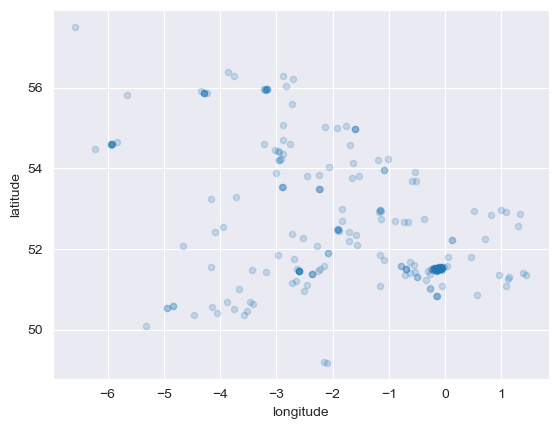

In [9]:
uk_data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

The datapoints are pretty well spread around the UK.

There appear to be clusters around London, Edinburgh, Glasgow, perhaps Bristol and possibly Belfast.

We will create an interactive map that also shows the range of stars

In [10]:
# Create a color map
colormap = branca.colormap.LinearColormap(colors=['lightblue','yellow','orange', 'red'],
                                          index=[0.5,1,2,3], # Define the index for the colors
                                          vmin=0,
                                          vmax=3)


# Create a map centered around the UK
uk_map = folium.Map(location=[55.3781, -3.4360], tiles='Stamen Terrain', zoom_start=6)

# Add a legend
colormap.caption = 'Michelin Stars'
uk_map.add_child(colormap)

# Add a marker for each point in your data
for idx, row in uk_data.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=colormap(row['stars']),  # Use the 'stars' value to determine the color
        fill=True,
        fill_opacity=0.1  # Control the opacity here
    ).add_to(uk_map)

# Add the color map legend to the map
colormap.add_to(uk_map)

# Display the map (commented out)
#uk_map

Static image of the above plot.

Running in own Jupyter environment allows interactivity

![img](../Images/Static_uk.png)

----
&nbsp;
## Exploratory analysis of numerical columns

There are only two 'real' numeric columns; `price_num` and `stars`

In [11]:
uk_data.describe()

,price_num,stars,longitude,latitude
count,285.000000,285.000000,285.000000,285.000000
mean,2.971930,0.954386,-1.421108,52.341948
std,0.945291,0.516990,1.722836,1.546778
min,1.000000,0.500000,-6.572520,49.181494
25%,2.000000,0.500000,-2.646062,51.499086
50%,3.000000,1.000000,-0.616289,51.519801
75%,4.000000,1.000000,-0.135226,52.954697
max,4.000000,3.000000,1.440814,57.515570


<AxesSubplot:xlabel='stars', ylabel='count'>

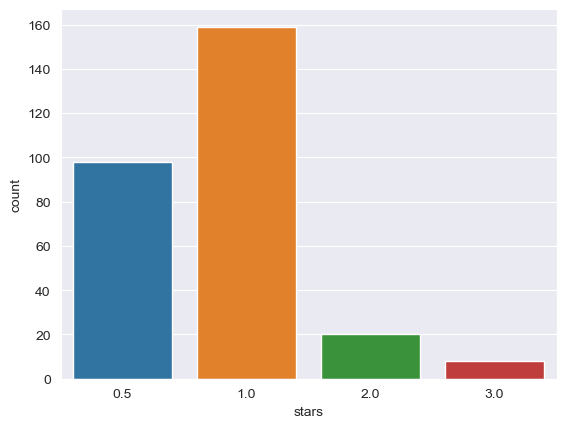

In [12]:
sns.countplot(x='stars', data=uk_data)

<AxesSubplot:xlabel='price_num', ylabel='count'>

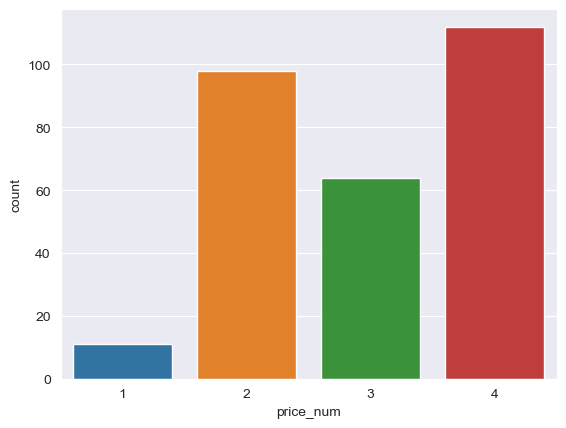

In [13]:
sns.countplot(x='price_num', data=uk_data)

<AxesSubplot:xlabel='stars', ylabel='price_num'>

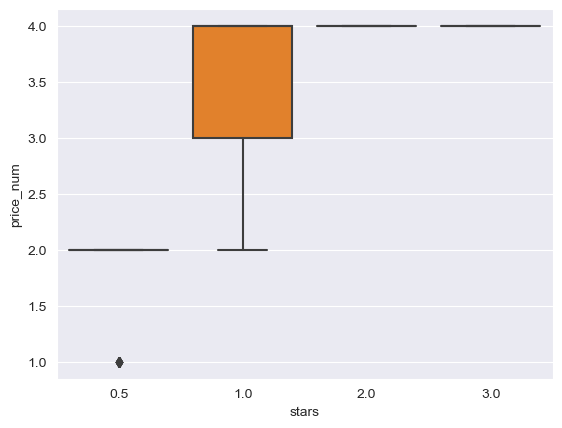

In [14]:
sns.boxplot(x='stars', y='price_num', data=uk_data)

Theres a reasonably large spread of price for 1 star restaurants

<AxesSubplot:>

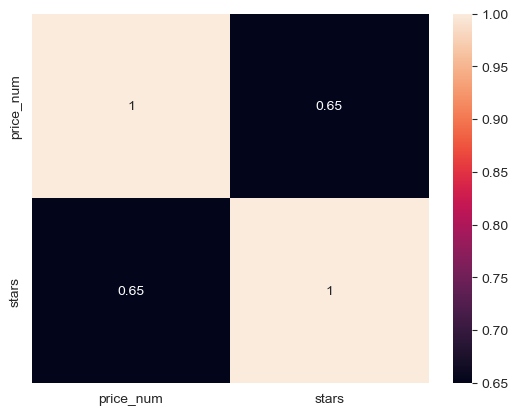

In [15]:
selected_columns = uk_data[["price_num", "stars"]]

# Calculate correlation matrix
correlation = selected_columns.corr()

# Create heatmap
sns.heatmap(correlation, annot=True)

The correlation heatmap *suggests* that as the number of Michelin stars for a restaurant increases, the price level of the restaurant also tends to increase.

However, ultimately, the above plots do not give a great indication of distribution of price levels or star ratings around the UK

----
&nbsp;
## Partitioning the data regionally

#### We partition the data first into `london` and `rest_of_uk`

In [16]:
# Create two new dataframes, one for London and one for the rest of the UK
london = uk_data[uk_data['city'] == 'London']
rest_of_uk= uk_data[uk_data['city'] != 'London']

#### Exploring `london` data

We use regular expressions to extract the first part of postcode from `address` creating a new column `postcode_area`

In [17]:
london = london.copy()
london['postcode_area'] = london['address'].str.extract(r'([A-Z]{1,2}\d[A-Z\d]?)', expand=False)

london.head()

,name,address,city,country,price,price_num,cuisine,url,award,stars,longitude,latitude,postcode_area
0,Sketch (The Lecture Room & Library),"9 Conduit Street, London, W1S 2XG, United Kingdom",London,United Kingdom,££££,4,Modern French,https://sketch.london/,3 MICHELIN Stars,3.0,-0.141537,51.512678,W1S
2,Alain Ducasse at The Dorchester,"Park Lane, London, W1K 1QA, United Kingdom",London,United Kingdom,££££,4,French,https://www.alainducasse-dorchester.com/,3 MICHELIN Stars,3.0,-0.152575,51.507338,W1K
3,Hélène Darroze at The Connaught,"Carlos Place, London, W1K 2AL, United Kingdom",London,United Kingdom,££££,4,Modern Cuisine,https://www.the-connaught.co.uk/restaurants-ba...,3 MICHELIN Stars,3.0,-0.149290,51.510188,W1K
5,CORE by Clare Smyth,"92 Kensington Park Road, London, W11 2PN, Unit...",London,United Kingdom,££££,4,Modern British,https://www.corebyclaresmyth.com/,3 MICHELIN Stars,3.0,-0.203065,51.512669,W11
6,Restaurant Gordon Ramsay,"68-69 Royal Hospital Road, London, SW3 4HP, Un...",London,United Kingdom,££££,4,French,https://www.gordonramsayrestaurants.com/restau...,3 MICHELIN Stars,3.0,-0.162177,51.485438,SW3


We aim to map tthe first part of the postcode, `postcode_area` to a London borough.

ONS data was obtained from [Doogal](https://www.doogal.co.uk/london_postcodes) and a mapping DataFrame created in `Notebooks/London Postcodes.ipynb`

In [18]:
boroughs = pd.read_csv('../data/postcode_district.csv')
boroughs.head()

,District,postcode_area
0,Bromley,BR1
1,Bromley,BR2
2,Bromley,BR3
3,Bromley,BR4
4,Bromley,BR5


We will merge the two dataframes on `postcode_area` creating a new column `borough`

In [19]:
# Now merge 'london' and 'postcode_district' on the 'postcode_area' column
london = london.merge(boroughs, on='postcode_area', how='left')

# After the merge, 'District' column from 'london_postcode_district' will be added to 'london' and renamed borough.
london.rename(columns={'District': 'borough'}, inplace=True)
cols = london.columns.tolist()

# Find the index of the 'address' column
address_index = cols.index('address')

# Insert 'price_num' into the correct position in the column list
cols.insert(address_index + 1, cols.pop(cols.index('borough')))

# Reindex the dataframe
london = london[cols]

# Drop the 'postcode_area' column
london = london.drop(columns=['postcode_area'])

In [20]:
london.head(10)

,name,address,borough,city,country,price,price_num,cuisine,url,award,stars,longitude,latitude
0,Sketch (The Lecture Room & Library),"9 Conduit Street, London, W1S 2XG, United Kingdom",Westminster,London,United Kingdom,££££,4,Modern French,https://sketch.london/,3 MICHELIN Stars,3.0,-0.141537,51.512678
1,Alain Ducasse at The Dorchester,"Park Lane, London, W1K 1QA, United Kingdom",Westminster,London,United Kingdom,££££,4,French,https://www.alainducasse-dorchester.com/,3 MICHELIN Stars,3.0,-0.152575,51.507338
2,Hélène Darroze at The Connaught,"Carlos Place, London, W1K 2AL, United Kingdom",Westminster,London,United Kingdom,££££,4,Modern Cuisine,https://www.the-connaught.co.uk/restaurants-ba...,3 MICHELIN Stars,3.0,-0.149290,51.510188
3,CORE by Clare Smyth,"92 Kensington Park Road, London, W11 2PN, Unit...",Kensington and Chelsea,London,United Kingdom,££££,4,Modern British,https://www.corebyclaresmyth.com/,3 MICHELIN Stars,3.0,-0.203065,51.512669
4,Restaurant Gordon Ramsay,"68-69 Royal Hospital Road, London, SW3 4HP, Un...",Kensington and Chelsea,London,United Kingdom,££££,4,French,https://www.gordonramsayrestaurants.com/restau...,3 MICHELIN Stars,3.0,-0.162177,51.485438
5,Alex Dilling at Hotel Café Royal,"68 Regent Street, London, W1B 4DY, United Kingdom",Westminster,London,United Kingdom,££££,4,Modern French,http://www.alexdilling.com,2 MICHELIN Stars,2.0,-0.135956,51.510020
6,The Ledbury,"127 Ledbury Road, London, W11 2AQ, United Kingdom",Kensington and Chelsea,London,United Kingdom,££££,4,Modern Cuisine,http://www.theledbury.com,2 MICHELIN Stars,2.0,-0.200073,51.516681
7,Da Terra,"8 Patriot Square, London, E2 9NF, United Kingdom",Tower Hamlets,London,United Kingdom,££££,4,Creative,https://daterra.co.uk/,2 MICHELIN Stars,2.0,-0.056070,51.530411
8,A. Wong,"70 Wilton Road, London, SW1V 1DE, United Kingdom",Westminster,London,United Kingdom,££££,4,Chinese,https://www.awong.co.uk/,2 MICHELIN Stars,2.0,-0.140656,51.493009
9,Le Gavroche,"43 Upper Brook Street, London, W1K 7QR, United...",Westminster,London,United Kingdom,££££,4,French,https://www.le-gavroche.co.uk/,2 MICHELIN Stars,2.0,-0.155257,51.511300


----
&nbsp;
## Exploring restaurant distribution by London Borough